# K_ras peptides

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

df_data = pd.read_csv('data/kras/all.tsv', sep='\t', header=None, names=['smi', 'IC50'])
df_data['IC50'] = df_data['IC50'].apply(lambda x: float(x.replace(',', '')))
df_data['score'] = df_data['IC50'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

df_data.to_csv('data/kras/raw/all.csv.gz', index=False, compression='gzip')
df_data.head()


,smi,IC50,score
0,NC(NCCC[C@H](NC([C@@H](NC([C@@H]1CSSC[C@H](NC([C@@H](NC([C@@H](NC(=O)C)CCCNC(=[NH2+])N)=O)CCCNC(=[NH2+])N)=O)C(=O)N2[C@@H](CCC2)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc3ccc(O)cc3)C(=O)N[C@@H]([C@H](CC)C)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc4ccc(O)cc4)C(=O)N[C@@H](CC(=O)O)C(=O)N5[C@@H](CCC5)C(=O)N[C@@H](C(C)C)C(=O)N1)=O)CCCNC(=[NH2+])N)=O)C(=O)N)=[NH2+].C(F)(F)(F)C([O-])=O,8.9,0.949390
1,CC[C@@H](C)[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N2CCC[C@H]2C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)N3CCC[C@H]3C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CC4=CC=C(C=C4)O)CC(C)C)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)[NH-])C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N)C(C)C)CC(=O)O)CC5=CC=C(C=C5)O)CO.[Ac],1.6,0.204120
2,CC[C@@H](C)[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N2CCC[C@H]2C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)N3CCC[C@H]3C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CC4=CC=C(C=C4)O)CC(C)C)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)[NH-])C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N)C(C)C)CC(=O)O)CC5=CC=C(C=C5)O)CO.[Ac],1.6,0.204120
3,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](NC(C)=O)CSSC[C@@H](C(N)=O)NC(=O)[C@H](C(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(=O)O)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CO)NC1=O,11.0,1.041393
4,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](CCCNC(=N)N)NC(C)=O)CSSC[C@@H](C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@H](CCCNC(=N)N)C(N)=O)NC(=O)[C@H](C(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(=O)O)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CO)NC1=O,6.1,0.785330


x range: 0.3 20600.0
y range: 6.882135433244682e-25 0.7034619565563733


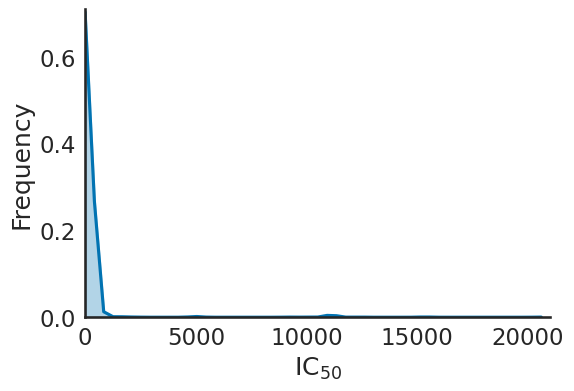

In [63]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")

# plot density of scores
scores = df_data['IC50'].values
x_min = np.min(scores)
x_max = np.max(scores)

x = np.linspace(x_min, x_max, 50)
y = stats.gaussian_kde(scores)(x)/sum(stats.gaussian_kde(scores)(x))

print('x range:', x_min, x_max)
print('y range:', np.min(y), np.max(y))

# ax.hist(df_data['score'], bins=100, color=plot_style_utils.CAT_PALETTE[0])
ax.plot(x, y, color=plot_style_utils.CAT_PALETTE[0])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(0, 21000)
ax.set_ylim(0, 0.71)

ax.set_xlabel('IC$_{50}$')
ax.set_ylabel('Frequency')

plot_style_utils.prettify_ax(ax)
plot_style_utils.save_for_pub(fig=fig, path='figures/kras/kras_ic50_dist')

x range: -0.5228787452803376 4.313867220369153
y range: 0.00045804134263905267 0.03672259518787954


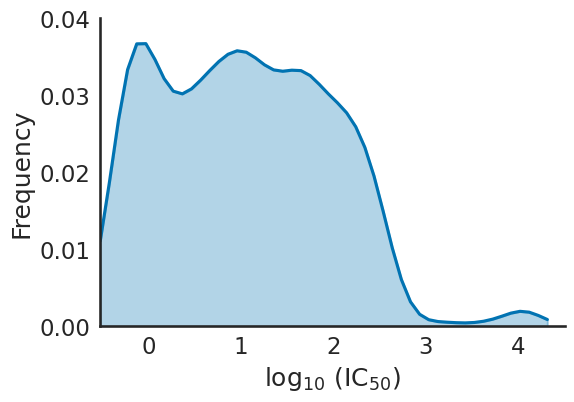

In [64]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")

# plot density of scores
scores = df_data['score'].values
x_min = np.min(scores)
x_max = np.max(scores)

x = np.linspace(x_min, x_max, 50)
y = stats.gaussian_kde(scores)(x)/sum(stats.gaussian_kde(scores)(x))

print('x range:', x_min, x_max)
print('y range:', np.min(y), np.max(y))

# ax.hist(df_data['score'], bins=100, color=plot_style_utils.CAT_PALETTE[0])
ax.plot(x, y, color=plot_style_utils.CAT_PALETTE[0])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(-0.53, 4.5)
ax.set_ylim(0, 0.04)

ax.set_xlabel('log$_{10}$ (IC$_{50}$)')
ax.set_ylabel('Frequency')

plot_style_utils.prettify_ax(ax)
plot_style_utils.save_for_pub(fig=fig, path='figures/kras/kras_ic50_log_dist')

## Feature processing

### Fingerprints (fps)

In [4]:
import warnings
import numpy as np
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import AllChem
from typing import List

rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def fingerprints_from_smiles(smiles: List, size=2048):
    """ Create ECFP fingerprints of smiles, with validity check """
    fps = []
    valid_mask = []
    for i, smile in enumerate(smiles):
        mol = Chem.MolFromSmiles(smile)
        valid_mask.append(int(mol is not None))
        fp = fingerprints_from_mol(mol, size=size) if mol else np.zeros((1, size))
        fps.append(fp)

    fps = np.concatenate(fps, axis=0)
    return fps, valid_mask


def fingerprints_from_mol(molecule, radius=3, size=2048, hashed=False):
    """ Create ECFP fingerprint of a molecule """
    if hashed:
        fp_bits = AllChem.GetHashedMorganFingerprint(molecule, radius, nBits=size)
    else:
        fp_bits = AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=size)
    fp_np = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp_bits, fp_np)
    return fp_np.reshape(1, -1)

In [66]:
# train = True
train = False
if train:
    X_fps = fingerprints_from_smiles(df_data.smi)[0]
    np.save('data/kras/processed/X_fps.npy', X_fps)
else:
    X_fps = np.load('data/kras/processed/X_fps.npy')

X_fps.shape

(2253, 2048)

### RDKit descriptors

In [2]:
import warnings
import numpy as np
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import AllChem
from typing import List
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def getMolDescriptors(mol, missingVal=0):
    """ calculate the full list of descriptors for a molecule """

    values, names = [], []
    for nm, fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            val = missingVal
        values.append(val)
        names.append(nm)

    custom_descriptors = {'hydrogen-bond donors': rdMolDescriptors.CalcNumLipinskiHBD,
                          'hydrogen-bond acceptors': rdMolDescriptors.CalcNumLipinskiHBA,
                          'rotatable bonds': rdMolDescriptors.CalcNumRotatableBonds,}
    for nm, fn in custom_descriptors.items():
        try:
            val = fn(mol)
        except:
            val = missingVal
        values.append(val)
        names.append(nm)
    return values,names

# getMolDescriptors('CC(=O)SCCCC[C@H](N)C(O)=O')

#### Peptide descriptors

In [3]:
def get_pep_dps_from_smi(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
    except:
        print(f"convert smi {smi} to molecule failed!")
        mol = None
    
    dps, _ = getMolDescriptors(mol)
    return np.array(dps)

def get_pep_dps(smi_list):
    return np.array([get_pep_dps_from_smi(smi) for smi in smi_list])

In [5]:
import numpy as np

# train = True
train = False
if train:
    
    X_dps = get_pep_dps(df_data.smi)

    np.save('data/kras/processed/X_dps.npy', X_dps)
else:
    X_dps = np.load('data/kras/processed/X_dps.npy')

X_dps.shape

(2253, 211)

## Modeling

### Final features

In [12]:
features = ['dps', ]
# features = ['fps', ]
# features = ['dps', 'fps', ]

X_features = []
for feat in features:
    try:
        X_feat = np.load(f'data/kras/processed/X_{feat}.npy')

        X_features.append(X_feat)
    except:
        raise ValueError(f'Feature {feat} not supported')

X = np.concatenate(X_features, axis=1)
y = df_data['score'].values
X.shape, y.shape

((2253, 211), (2253,))

In [17]:
import pickle

val_split = 1
split_file = 'data/kras/raw/scaffold_k_fold_idxes.pkl'
with open(split_file, 'rb') as f:
    split_idx = pickle.load(f)

val_idx = split_idx[val_split]
test_idx = split_idx[val_split+1]
train_splits = [split_idx[i] for i in range(len(split_idx))if i != val_split+1 and i != val_split]  # the rest are training data
train_idx = np.concatenate(train_splits, axis=0)

In [18]:
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

### XGBoost regressor

In [20]:
from xgboost import XGBRegressor
import joblib

from sklearn.preprocessing import StandardScaler

# scale y_train to focus on small values
# y_train = np.log(y_train)
# y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)

X_val = scaler.transform(X_val)
y_val_hat = model.predict(X_val)
X_test = scaler.transform(X_test)
y_test_hat = model.predict(X_test)

In [21]:
from scipy import stats


y_hat_val_test = np.concatenate([y_val_hat, y_test_hat])
y_val_test = np.concatenate([y_val, y_test])
spearman = stats.spearmanr(y_hat_val_test, y_val_test)
print(f'Val+Test Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')

spearman = stats.spearmanr(y_train_hat, y_train)
print(f'Train Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')
spearman = stats.spearmanr(y_val_hat, y_val)
print(f'Val Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')
spearman = stats.spearmanr(y_test_hat, y_test)
print(f'Test Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')

Val+Test Spearman: -0.027, p-value: 0.558
Train Spearman: 0.988, p-value: 0.000
Val Spearman: 0.241, p-value: 0.000
Test Spearman: -0.233, p-value: 0.000
